## Importing libraries and packages

In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Embedding
from keras.layers import Convolution1D, MaxPooling1D
from keras.datasets import imdb
from keras import backend as K

Using Theano backend.


In [2]:
#embedding
max_features = 5000
maxlen = 400

embedding_dims = 50

#convolution
nb_filter = 250
filter_length = 3

hidden_dims = 250

#training
nb_epoch = 2
batch_size = 32

## Loading Data

In [3]:
import pandas as pd
data = pd.read_csv( "labeledTrainData.tsv", header=0, 
 delimiter="\t", quoting=3, encoding="utf-8" )

In [4]:
data['review'][0:5], data['sentiment'][0:5]

(0    "With all this stuff going down at the moment ...
 1    "\"The Classic War of the Worlds\" by Timothy ...
 2    "The film starts with a manager (Nicholas Bell...
 3    "It must be assumed that those who praised thi...
 4    "Superbly trashy and wondrously unpretentious ...
 Name: review, dtype: object, 0    1
 1    1
 2    0
 3    0
 4    1
 Name: sentiment, dtype: int64)

## Cleaning data

In [5]:
import re
k = []
for i in data['review']:
    k.append(i.encode('utf-8'))

In [6]:
from keras.preprocessing.text import Tokenizer, base_filter

max_vocab_size = 50000
tokenizer = Tokenizer(nb_words=max_vocab_size,
                     filters=base_filter()+'“”–')

tokenizer.fit_on_texts(k)
X_train = []
vocab_size = len(tokenizer.word_index) + 1
for seq in tokenizer.texts_to_sequences(k):
       X_train.append(seq)

In [7]:
print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=100)

Pad sequences (samples x time)


In [8]:
Y_train = np.asarray(list(data['sentiment']))
print(Y_train)

[1 1 0 ..., 0 0 1]


## Building model

In [9]:
model = Sequential()

In [10]:
model.add(Embedding(50000,
                    embedding_dims,
                    input_length=100,
                    dropout=0.2))
model.add(Convolution1D(nb_filter=32,
                        filter_length=filter_length,
                        border_mode='valid',
                        activation='relu',
                        subsample_length=1))
model.add(MaxPooling1D(pool_length=model.output_shape[1]))
model.add(Flatten())
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X_train, Y_train,
          batch_size=batch_size,
          nb_epoch=nb_epoch,
          validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/2
20000/20000 [==============================] - 31s - loss: 0.5154 - acc: 0.7287 - val_loss: 0.3957 - val_acc: 0.8266
Epoch 2/2
20000/20000 [==============================] - 45s - loss: 0.3434 - acc: 0.8501 - val_loss: 0.3636 - val_acc: 0.8382


In [12]:
model.predict(X_train)

array([[ 0.70430762],
       [ 0.65062225],
       [ 0.08837233],
       ..., 
       [ 0.01092899],
       [ 0.4599663 ],
       [ 0.97542989]], dtype=float32)

# Testing

### Segmented calls

#### Creating segments of ALL 9 calls

In [13]:
import re
def run():
	file = open("allcalls.txt")
 	ret = []
	while 1:
		line = file.readline()
		if not line:
			break
		if line[:8] == 'Customer':
			line = line[8:]
			line = line.strip()
			line = line.replace(',',';')
			line = line.replace('.',';')
			line = line.replace(':',';')
			ret.extend(line.split(';'))
	res = []
	for k in ret:
		if k.strip() != "":
			res.append(k.strip())
	print res
	return res

def main():
	run()



if __name__ == '__main__':
	main()

['I would like to know  my remaining money in my account', 'Sure', "it's Tracy Q", 'Randall', 'account number is 805-7845-3895-061', 'It is ****', 'Yes', 'If I transfer it to my bank account in Lloyds of London', 'how long will it take?', 'Oh', 'I see', 'never mind', "I'll just do it after the holidays", 'Thanks for your help', 'Heather!', 'This is John Perez', 'I want One Family size of Pepperoni and 2 Regular Supreme', 'Yep', 'deliver it at 745 Farmers Road', 'Modesto', 'California', 'Sure', "I'll just pay it in cash once it's delivered", 'I am calling because I received a wrong bill', 'I just paid my phone bill two days ago and my                    payment is not reflected in the bill', '5340036548', '5340036548', 'Maegan Simpson', 'July 23', '1974 and the account is under my name', 'Thank you', 'Ok I will', 'No thanks', 'Ok bye', 'Yeah', 'hi', 'My system is down and I need to speak with a technician', 'Fred', 'I\xe2\x80\x99m with GoldStar Environmental', 'Yes ma\xe2\x80\x99am', '6

In [14]:
op = run()

['I would like to know  my remaining money in my account', 'Sure', "it's Tracy Q", 'Randall', 'account number is 805-7845-3895-061', 'It is ****', 'Yes', 'If I transfer it to my bank account in Lloyds of London', 'how long will it take?', 'Oh', 'I see', 'never mind', "I'll just do it after the holidays", 'Thanks for your help', 'Heather!', 'This is John Perez', 'I want One Family size of Pepperoni and 2 Regular Supreme', 'Yep', 'deliver it at 745 Farmers Road', 'Modesto', 'California', 'Sure', "I'll just pay it in cash once it's delivered", 'I am calling because I received a wrong bill', 'I just paid my phone bill two days ago and my                    payment is not reflected in the bill', '5340036548', '5340036548', 'Maegan Simpson', 'July 23', '1974 and the account is under my name', 'Thank you', 'Ok I will', 'No thanks', 'Ok bye', 'Yeah', 'hi', 'My system is down and I need to speak with a technician', 'Fred', 'I\xe2\x80\x99m with GoldStar Environmental', 'Yes ma\xe2\x80\x99am', '6

In [15]:
import re
l = []
for i in op:
    l.append(i)#.encode('utf-8'))

In [16]:
from keras.preprocessing.text import Tokenizer, base_filter

max_vocab_size = 50000
tokenizer = Tokenizer(nb_words=max_vocab_size,
                     filters=base_filter()+'“”–')
tokenizer.fit_on_texts(l)
test2 = []
vocab_size = len(tokenizer.word_index) + 1
for seq in tokenizer.texts_to_sequences(l):
       test2.append(seq)

In [17]:
print('Pad sequences (samples x time)')
test2 = sequence.pad_sequences(test2, maxlen=100)

Pad sequences (samples x time)


In [18]:
k5=model.predict(test2)

In [19]:
k5_bin = model.predict_classes(test2)

256/261 [============================>.] - ETA: 0s

In [20]:
def bin2Scaled(magnitude):
	# This function converts a binary measurement (of sentiment analysis)
	# into a 7-point assesment as is used currently at Google.
	return 1+magnitude*6

##### Obtaining scaled score from all segments of all 9 calls.

In [21]:
scaledScore = np.zeros(len(k5_bin))
for i in range(0,len(k5_bin)-1):
    scaledScore[i] = bin2Scaled(k5[i])
scaledScore

array([ 6.04766464,  5.15589809,  6.18301249,  4.79773426,  6.76672649,
        5.57815695,  4.87758303,  6.29207563,  5.47928143,  5.11838818,
        5.02658081,  5.53126144,  5.609375  ,  2.26353526,  4.54394722,
        6.20382833,  6.78534508,  4.91048908,  6.43428659,  4.94085598,
        4.78712749,  5.15589809,  5.95059204,  5.55229235,  5.96836853,
        4.94577885,  4.94577885,  5.11922741,  3.05053353,  5.29230595,
        5.80120659,  5.19657612,  5.23361492,  4.00912762,  4.88805103,
        5.46540213,  6.79944515,  5.4739852 ,  5.73249054,  5.11979628,
        4.7159338 ,  4.87758303,  6.74354887,  5.06651354,  5.95406008,
        3.5496881 ,  5.73711967,  5.54652977,  4.92176199,  3.44571424,
        5.01355553,  6.77848625,  5.00209284,  3.71776319,  6.63403988,
        5.5029459 ,  4.70837498,  5.00209284,  6.60815144,  5.11667585,
        5.00209284,  4.30017042,  5.4095726 ,  6.37326622,  3.65052485,
        5.46540213,  5.84488297,  4.8093853 ,  5.86236906,  4.95

## Whole conversation (9 calls -> 9 sentiments)

In [22]:
d = pd.read_csv("dialogs.csv")

In [23]:
d["dialogs"]

0    I would like to know  my remaining money in my...
1    This is John Perez I want One Family size of P...
2    I am calling because I received a wrong bill I...
3    Yeah hi My system is down and I need to speak ...
4    yes or no Then we have to ask may I know whom ...
5    Pawn That\xe2\x80\x99s a nice name Not bad hav...
6    Yes OMG \xe2\x80\x94 please stop empathizing w...
7    I am doing ok yourself? I am wanting to inquir...
8    hello I bought simcity and told I cannot insta...
Name: dialogs, dtype: object

In [24]:
import re
calls = []
for i in d["dialogs"]:
    calls.append(i.encode('utf-8'))

In [25]:
from keras.preprocessing.text import Tokenizer, base_filter

max_vocab_size = 50000
tokenizer = Tokenizer(nb_words=max_vocab_size,
                     filters=base_filter()+'“”–')
tokenizer.fit_on_texts(calls)
test3 = []
vocab_size = len(tokenizer.word_index) + 1
for seq in tokenizer.texts_to_sequences(calls):
       test3.append(seq)

In [26]:
print('Pad sequences (samples x time)')
test3 = sequence.pad_sequences(test3, maxlen=100)

Pad sequences (samples x time)


In [27]:
k6=model.predict(test3)

In [28]:
k6_bin = model.predict_classes(test3)

9/9 [==============================] - 0s


In [29]:
scaledScore = np.zeros(len(k6_bin))
for i in range(0,len(k6_bin)):
    scaledScore[i] = bin2Scaled(k6[i])
scaledScore

array([ 1.55943871,  3.77648735,  1.49133146,  4.12481976,  2.09334517,
        2.42979455,  2.25291586,  2.79293728,  2.60506821])

## The one with largest no of segments (Call #8)

In [30]:
import re
def run():
	file = open("8.txt")
 	ret = []
	while 1:
		line = file.readline()
		if not line:
			break
		if line[:8] == 'Customer':
			line = line[8:]
			line = line.strip()
			line = line.replace(',',';')
			line = line.replace('.',';')
			line = line.replace(':',';')
			ret.extend(line.split(';'))
	res = []
	for k in ret:
		if k.strip() != "":
			res.append(k.strip())
	print res
	return res

def main():
	run()



if __name__ == '__main__':
	main()

['I am doing ok', 'yourself?', 'I am wanting to inquire about adding HD service and/or DVR to my existing plan', 'I am deciding whether to stay with comcast or move to AT&T', 'How much extra would it be to add HD alone? How much would it be to add HD and DVR? Is there a special pricing you can give to me as an existing customer no longer on contract?', 'There must be a typo in your last statement', '$15', '95!?', 'I contacted Comcast about a month or so ago and the young lady quoted me about $6', '00', 'Maybe you meant to type $5', '95?', 'Does that include DVR or just HD?', 'Ok', 'how about adding extra channels? Are there any options available for that?', 'How many? Which ones?', '?', 'So the HDHBO', 'HDStarz', 'and HDTMC are included free?', 'and when you say "many more', '" I would like to know specifically what channels', 'And what is the one more good thing?', 'I am not interested in 3D', 'thank you', 'I would like you to answer my above two questions', 'Would I be paying anythin

In [31]:
hg = run()

['I am doing ok', 'yourself?', 'I am wanting to inquire about adding HD service and/or DVR to my existing plan', 'I am deciding whether to stay with comcast or move to AT&T', 'How much extra would it be to add HD alone? How much would it be to add HD and DVR? Is there a special pricing you can give to me as an existing customer no longer on contract?', 'There must be a typo in your last statement', '$15', '95!?', 'I contacted Comcast about a month or so ago and the young lady quoted me about $6', '00', 'Maybe you meant to type $5', '95?', 'Does that include DVR or just HD?', 'Ok', 'how about adding extra channels? Are there any options available for that?', 'How many? Which ones?', '?', 'So the HDHBO', 'HDStarz', 'and HDTMC are included free?', 'and when you say "many more', '" I would like to know specifically what channels', 'And what is the one more good thing?', 'I am not interested in 3D', 'thank you', 'I would like you to answer my above two questions', 'Would I be paying anythin

In [32]:
import re
max = []
for i in hg:
    max.append(i.encode('utf-8'))

In [33]:
from keras.preprocessing.text import Tokenizer, base_filter

max_vocab_size = 50000

# `filters` specify what characters to get rid of
# `base_filter()` includes basic punctuation;
# I like to extend it with common unicode punctuation
tokenizer = Tokenizer(nb_words=max_vocab_size,
                     filters=base_filter()+'“”–')

# fit the tokenizer
tokenizer.fit_on_texts(max)
test_max = []
# we also want to keep track of the actual vocab size
# we'll need this later
# note: we add one because `0` is a reserved index in keras' tokenizer
vocab_size = len(tokenizer.word_index) + 1
for seq in tokenizer.texts_to_sequences(max):
       test_max.append(seq)

In [34]:
print('Pad sequences (samples x time)')
test_max = sequence.pad_sequences(test_max, maxlen=100)

Pad sequences (samples x time)


In [35]:
h=model.predict(test_max)

In [36]:
h

array([[ 0.85624725],
       [ 0.58896321],
       [ 0.73949665],
       [ 0.95912975],
       [ 0.83639282],
       [ 0.74930257],
       [ 0.65324247],
       [ 0.69080162],
       [ 0.60470635],
       [ 0.64779443],
       [ 0.56965792],
       [ 0.69080162],
       [ 0.69204199],
       [ 0.6649394 ],
       [ 0.46089903],
       [ 0.64447361],
       [ 0.65174818],
       [ 0.6616528 ],
       [ 0.60447258],
       [ 0.42961124],
       [ 0.31392112],
       [ 0.88930011],
       [ 0.90594763],
       [ 0.68473691],
       [ 0.68770593],
       [ 0.51950604],
       [ 0.29415703],
       [ 0.17757387],
       [ 0.76481646],
       [ 0.3028959 ],
       [ 0.06503688],
       [ 0.57646489],
       [ 0.85670274],
       [ 0.57646495],
       [ 0.85670274],
       [ 0.6649394 ],
       [ 0.34669504],
       [ 0.69061416],
       [ 0.6981889 ],
       [ 0.6204071 ],
       [ 0.95529681],
       [ 0.69067615],
       [ 0.76199269],
       [ 0.82062954],
       [ 0.95248872],
       [ 0

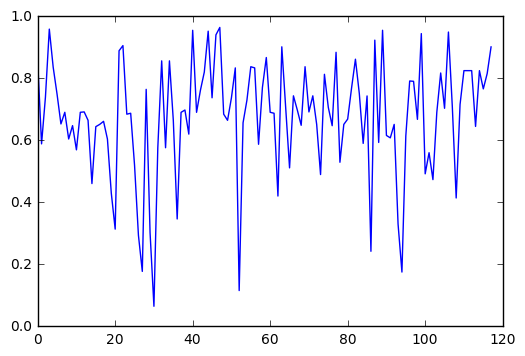

In [37]:
a = []
b = []
index = 0
for t in h:
    b.append(index)
    index = index + 1
    a.append(t[0])
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(b,a)

In [38]:
h_bin = model.predict_classes(test_max)

118/118 [==============================] - 0s     
